In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10
import numpy as np

In [0]:
EmptyBoard = '.'*9

In [0]:
def MakeTurn(sign, position, board):
  if board[position] != ".":
    return((board, sign + " wrong move"))
  else:
    board = board[:position] + sign + board[position+1:]
    if board[0]+board[1]+board[2] == sign*3:
      return ((board,sign+" win"))
    if board[3]+board[4]+board[5] == sign*3:
      return ((board,sign+" win"))
    if board[6]+board[7]+board[8] == sign*3:
      return ((board,sign+" win"))
    if board[0]+board[3]+board[6] == sign*3:
      return ((board,sign+" win"))
    if board[1]+board[4]+board[7] == sign*3:
      return ((board,sign+" win"))
    if board[2]+board[5]+board[8] == sign*3:
      return ((board,sign+" win"))
    if board[0]+board[4]+board[8] == sign*3:
      return ((board,sign+" win"))
    if board[2]+board[4]+board[6] == sign*3:
      return ((board,sign+" win"))
    
    if not ("." in board):
      return (board,"draw") 
    return ((board,"Ok"))

def PrintBoard(board):
  print(board[:3]+"\n"+board[3:6]+"\n"+board[6:]+"\n")

In [4]:
%%time
board, status = MakeTurn("X", 8, EmptyBoard)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 11 µs


In [5]:
PrintBoard(board)

...
...
..X



In [0]:
def PlayGame(XStrat, OStrat):
  board_story = ["."*9]
  move_story = []
  board = "."*9
  status = ""
  for i in range(5):
    Xmove = XStrat(board)
    board, status = MakeTurn("X", Xmove, board)
    board_story.append(board)
    move_story.append(Xmove)
    if status != "Ok":
      return (status, board_story, move_story)
    Omove = OStrat(board)
    board, status = MakeTurn("O", Omove, board)
    board_story.append(board)
    move_story.append(Omove)
    if status != "Ok":
      return (status, board_story, move_story)


In [0]:
import random
def RandomMove(board):
  return random.choice([pos for pos, char in enumerate(board) if char == "."])


In [8]:
PlayGame(RandomMove, RandomMove)

('X win',
 ['.........',
  '.....X...',
  '.....XO..',
  'X....XO..',
  'XO...XO..',
  'XO...XO.X',
  'XO..OXO.X',
  'XOX.OXO.X'],
 [5, 6, 0, 1, 8, 4, 2])

In [9]:
PrintBoard('OOXXXOXOX')

OOX
XXO
XOX



In [10]:
%%time
Xwins = 0
Owins = 0
Draws = 0
for i in range(10000):
  status, story, moves = PlayGame(RandomMove, RandomMove)
  if status == "X win":
    Xwins += 1
  if status == "O win":
    Owins += 1
  if status == "draw":
    Draws += 1
print("X: "+str(Xwins) )
print("O: "+str(Owins) )
print("D: "+str(Draws) )

X: 5823
O: 2955
D: 1222
CPU times: user 319 ms, sys: 800 µs, total: 320 ms
Wall time: 321 ms


In [11]:
3**9

19683

In [0]:
import numpy as np

class QStrategy:
  def __init__(self, lr, epsilon):
    self.lr = lr
    self.epsilon = epsilon
    self.Q = {}

  def SetQValue(self, board, move, value):
    if not (board in self.Q):
      self.Q[board] = [0]*9
      for i in range(9):
        if board[i] != '.':
          self.Q[board][i] = -10 
    self.Q[board][move] = value
  
  def GreedyBestMove(self, board):
    if not (board in self.Q):
      self.Q[board] = [0]*9
      for i in range(9):
        if board[i] != '.':
          self.Q[board][i] = -10 

    ind = np.argmax(self.Q[board])
    return ind

  def UpdateQ(self, board, move, new_board):
    if not (board in self.Q):
      self.Q[board] = [0]*9
    self.Q[board][move] = self.Q[board][move] + self.lr*(max(self.Q[new_board]) - self.Q[board][move])

  def ExplorativeBestMove(self, board):
    if not (board in self.Q):
      self.Q[board] = [0]*9
      for i in range(9):
        if board[i] != '.':
          self.Q[board][i] = -10 
    if random.random() < self.epsilon:
      return RandomMove(board)
    ind = np.argmax(self.Q[board])
    return ind

    



In [0]:
MyStrat = QStrategy(lr = 0.2, epsilon = 0.2)

In [14]:
PlayGame(RandomMove, MyStrat.GreedyBestMove)

('X win',
 ['.........',
  '.X.......',
  'OX.......',
  'OX....X..',
  'OXO...X..',
  'OXOX..X..',
  'OXOXO.X..',
  'OXOXO.X.X',
  'OXOXOOX.X',
  'OXOXOOXXX'],
 [1, 0, 6, 2, 3, 4, 8, 5, 7])

In [0]:
def Evaluate(XStrat, OStrat, GameNumber = 10000):
  Xwins = 0
  Owins = 0
  Draws = 0
  for i in range(GameNumber):
    status, story, moves = PlayGame(XStrat, OStrat)
    if status == "X win":
      Xwins += 1
    if status == "O win":
      Owins += 1
    if status == "draw":
      Draws += 1
  print("X: "+str(Xwins) )
  print("O: "+str(Owins) )
  print("D: "+str(Draws) )
  return (Xwins + 0.5 * Draws)/GameNumber


In [16]:
%%time
Evaluate(RandomMove, MyStrat.GreedyBestMove, 10000)


X: 5205
O: 4392
D: 403
CPU times: user 496 ms, sys: 6.64 ms, total: 503 ms
Wall time: 498 ms


0.54065

In [0]:
#MyStrat.Q

In [17]:
MaxEpoches = 20
score1 = [Evaluate(RandomMove, MyStrat.GreedyBestMove, 1000)]
time_line = [0]
for epoche in range(MaxEpoches):
  for i in range(1000):
    result, story, moves = PlayGame(RandomMove, MyStrat.GreedyBestMove)
    if result == "O wrong move":
    #  MyStrat.SetQValue(story[-2], moves[-1], -10)
      print("Something goes wrong")
    if result == "X win":
      MyStrat.SetQValue(story[-3], moves[-2], -1)
    if result == "O win":
      MyStrat.SetQValue(story[-2], moves[-1], +1)
    if result == "draw":
      MyStrat.SetQValue(story[-3], moves[-2], 0)
    for i in range(7, 2, -2):
      if i < len(moves)-1:
        MyStrat.UpdateQ(story[i-2], moves[i-2], story[i])
  score1.append(Evaluate(RandomMove, MyStrat.GreedyBestMove, 1000))
  time_line.append(1000*(epoche+1))

X: 532
O: 429
D: 39
X: 191
O: 658
D: 151
X: 171
O: 661
D: 168
X: 145
O: 607
D: 248
X: 109
O: 640
D: 251
X: 114
O: 607
D: 279
X: 84
O: 629
D: 287
X: 54
O: 666
D: 280
X: 26
O: 708
D: 266
X: 16
O: 723
D: 261
X: 2
O: 711
D: 287
X: 2
O: 713
D: 285
X: 6
O: 675
D: 319
X: 1
O: 716
D: 283
X: 0
O: 710
D: 290
X: 0
O: 685
D: 315
X: 0
O: 729
D: 271
X: 0
O: 704
D: 296
X: 0
O: 692
D: 308
X: 0
O: 709
D: 291
X: 0
O: 713
D: 287


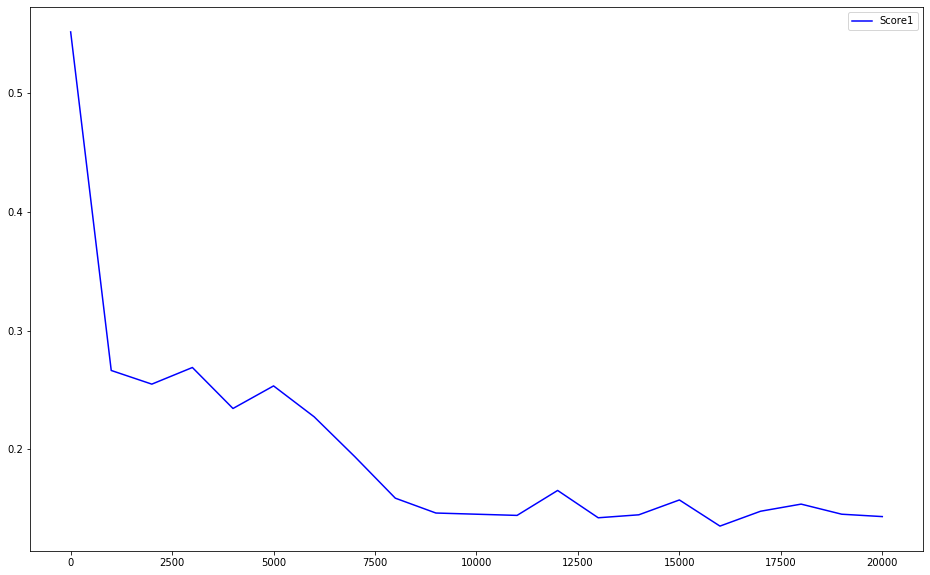

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(time_line, score1, color='blue')
plt.legend(['Score1'], loc='upper right')


In [19]:
Strat2 = QStrategy(0.2, 0.2)

MaxEpoches = 20
score2 = [Evaluate(RandomMove, Strat2.ExplorativeBestMove, 1000)]
score3 = [Evaluate(RandomMove, Strat2.GreedyBestMove, 1000)]
time_line_2 = [0]
for epoche in range(MaxEpoches):
  for i in range(1000):
    result, story, moves = PlayGame(RandomMove, Strat2.ExplorativeBestMove)
    if result == "O wrong move":
    #  MyStrat.SetQValue(story[-2], moves[-1], -10)
      print("Something goes wrong")
    if result == "X win":
      Strat2.SetQValue(story[-3], moves[-2], -1)
    if result == "O win":
      Strat2.SetQValue(story[-2], moves[-1], +1)
    if result == "draw":
      Strat2.SetQValue(story[-3], moves[-2], 0)
    for i in range(7, 2, -2):
      if i < len(moves)-1:
        Strat2.UpdateQ(story[i-2], moves[i-2], story[i])
  score2.append(Evaluate(RandomMove, Strat2.ExplorativeBestMove, 1000))
  score3.append(Evaluate(RandomMove, Strat2.GreedyBestMove, 1000))
  time_line_2.append(1000*(epoche+1))

X: 534
O: 391
D: 75
X: 491
O: 455
D: 54
X: 327
O: 528
D: 145
X: 183
O: 644
D: 173
X: 278
O: 556
D: 166
X: 146
O: 686
D: 168
X: 241
O: 601
D: 158
X: 124
O: 715
D: 161
X: 191
O: 636
D: 173
X: 68
O: 776
D: 156
X: 194
O: 634
D: 172
X: 29
O: 799
D: 172
X: 174
O: 633
D: 193
X: 53
O: 772
D: 175
X: 160
O: 690
D: 150
X: 53
O: 796
D: 151
X: 205
O: 649
D: 146
X: 101
O: 750
D: 149
X: 181
O: 669
D: 150
X: 57
O: 807
D: 136
X: 148
O: 695
D: 157
X: 14
O: 836
D: 150
X: 130
O: 692
D: 178
X: 12
O: 816
D: 172
X: 154
O: 680
D: 166
X: 32
O: 824
D: 144
X: 133
O: 715
D: 152
X: 22
O: 843
D: 135
X: 169
O: 676
D: 155
X: 37
O: 784
D: 179
X: 108
O: 748
D: 144
X: 14
O: 846
D: 140
X: 103
O: 729
D: 168
X: 2
O: 850
D: 148
X: 119
O: 743
D: 138
X: 11
O: 867
D: 122
X: 119
O: 748
D: 133
X: 2
O: 874
D: 124
X: 103
O: 721
D: 176
X: 0
O: 876
D: 124
X: 95
O: 741
D: 164
X: 2
O: 873
D: 125


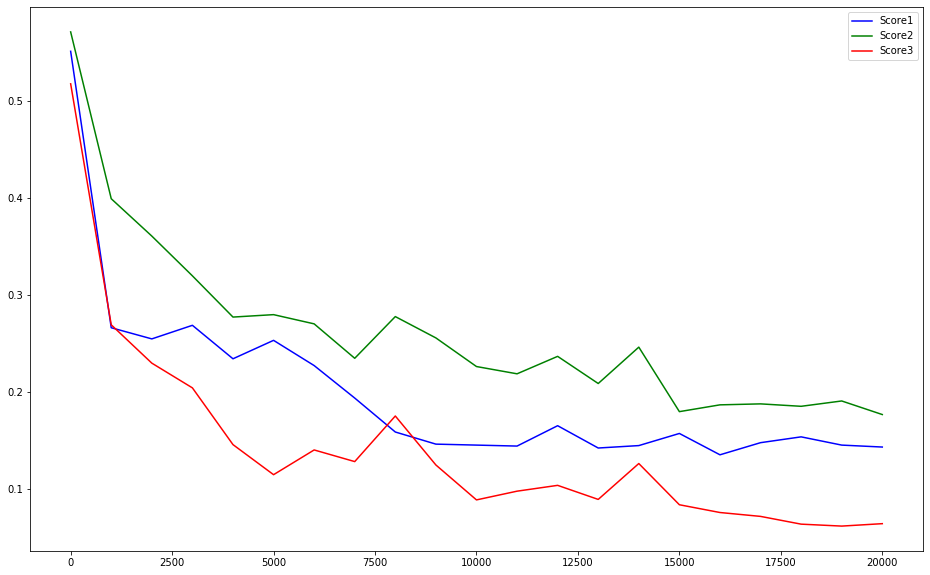

In [20]:
fig = plt.figure()
plt.plot(time_line, score1, color='blue')
plt.plot(time_line_2, score2, color='green')
plt.plot(time_line_2, score3, color='red')
plt.legend(['Score1', "Score2", "Score3"], loc='upper right')

In [21]:
Strat3 = QStrategy(0.2, 0.2)

MaxEpoches = 20
score4 = [Evaluate(RandomMove, Strat3.GreedyBestMove, 1000)]
time_line_4 = [0]
for epoche in range(MaxEpoches):
  for i in range(1000):
    result, story, moves = PlayGame(RandomMove, Strat3.ExplorativeBestMove)
    if result == "O wrong move":
    #  MyStrat.SetQValue(story[-2], moves[-1], -10)
      print("Something goes wrong")
    if result == "X win":
      Strat3.SetQValue(story[-3], moves[-2], -1)
    if result == "O win":
      Strat3.SetQValue(story[-2], moves[-1], +1)
    if result == "draw":
      Strat3.SetQValue(story[-3], moves[-2], 0)
    for i in range(1, len(moves), 2):
      if i + 2 < len(moves):
        Strat3.UpdateQ(story[i], moves[i], story[i+2])
  score4.append(Evaluate(RandomMove, Strat3.GreedyBestMove, 1000))
  time_line_4.append(1000*(epoche+1))

X: 503
O: 448
D: 49
X: 175
O: 675
D: 150
X: 81
O: 746
D: 173
X: 60
O: 783
D: 157
X: 40
O: 821
D: 139
X: 22
O: 840
D: 138
X: 33
O: 856
D: 111
X: 35
O: 836
D: 129
X: 37
O: 820
D: 143
X: 22
O: 841
D: 137
X: 19
O: 851
D: 130
X: 21
O: 864
D: 115
X: 17
O: 848
D: 135
X: 15
O: 873
D: 112
X: 8
O: 861
D: 131
X: 47
O: 867
D: 86
X: 7
O: 876
D: 117
X: 22
O: 886
D: 92
X: 10
O: 888
D: 102
X: 5
O: 890
D: 105
X: 9
O: 874
D: 117


In [22]:
Strat4 = QStrategy(0.2, 0.2)

MaxEpoches = 20
score5 = [Evaluate(RandomMove, Strat4.GreedyBestMove, 1000)]
time_line_5 = [0]
for epoche in range(MaxEpoches):
  for i in range(1000):
    result, story, moves = PlayGame(RandomMove, Strat4.ExplorativeBestMove)
    for i in range(1, len(moves), 2):
      if i + 2 < len(moves):
        Strat4.UpdateQ(story[i], moves[i], story[i+2])
    if result == "O wrong move":
    #  MyStrat.SetQValue(story[-2], moves[-1], -10)
      print("Something goes wrong")
    if result == "X win":
      Strat4.SetQValue(story[-3], moves[-2], -1)
    if result == "O win":
      Strat4.SetQValue(story[-2], moves[-1], +1)
    if result == "draw":
      Strat4.SetQValue(story[-3], moves[-2], 0)
  score5.append(Evaluate(RandomMove, Strat4.GreedyBestMove, 1000))
  time_line_5.append(1000*(epoche+1))

X: 514
O: 452
D: 34
X: 180
O: 655
D: 165
X: 136
O: 712
D: 152
X: 100
O: 731
D: 169
X: 72
O: 798
D: 130
X: 77
O: 809
D: 114
X: 62
O: 816
D: 122
X: 56
O: 814
D: 130
X: 52
O: 821
D: 127
X: 48
O: 855
D: 97
X: 36
O: 835
D: 129
X: 40
O: 861
D: 99
X: 32
O: 843
D: 125
X: 29
O: 867
D: 104
X: 23
O: 864
D: 113
X: 27
O: 854
D: 119
X: 22
O: 870
D: 108
X: 19
O: 858
D: 123
X: 28
O: 868
D: 104
X: 20
O: 871
D: 109
X: 12
O: 899
D: 89


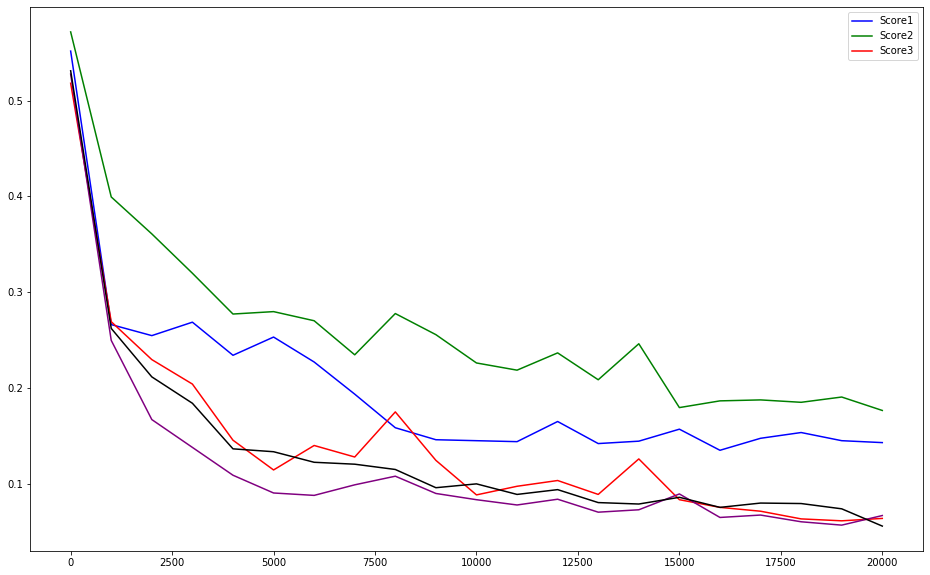

In [23]:
fig = plt.figure()
plt.plot(time_line, score1, color='blue')
plt.plot(time_line_2, score2, color='green')
plt.plot(time_line_2, score3, color='red')
plt.plot(time_line_4, score4, color='purple')
plt.plot(time_line_5, score5, color='black')
plt.legend(['Score1', "Score2", "Score3"], loc='upper right')

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [0]:
class Simple_Net(nn.Module):
    def __init__(self, l1_size = 50, l2_size = 50):
        super(Simple_Net, self).__init__()
        self.fc1 = nn.Linear(18, l1_size)
        self.fc2 = nn.Linear(l1_size, l2_size)
        self.fc3 = nn.Linear(l2_size, 9)
        self.optimizer = optim.Adam(self.parameters(), lr=0.003)
        self.gamma = 0.3
        self.loss_function = nn.MSELoss()
        self.epsilon = 0.2

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def BoardToTensor(self, board):
      board_tensor = torch.zeros(18, dtype=torch.float)
      for i in range(9):
        if board[i] == "X":
          board_tensor[i] = 1
        elif board[i] == "O":
          board_tensor[i+9] = 1
      return board_tensor

    def Move(self, board):
      board_tensor = self.BoardToTensor(board)
      output = self(board_tensor)
      for i in range(9):
        if board[i] != ".":
          output[i] = -1000
      values, indices = output.max(0)
      return indices.item()
      
    def SearchMove(self, board):
      if random.random() < self.epsilon:
        return RandomMove(board)
      board_tensor = self.BoardToTensor(board)
      output = self(board_tensor)
      for i in range(9):
        if board[i] != ".":
          output[i] = -10
      values, indices = output.max(0)
      return indices.item()

    def SetQValue(self, board, move, value):
      board_tensor = self.BoardToTensor(board)
      with torch.no_grad():
        target = self(board_tensor)
        target[move] = value
      self.train()
      self.optimizer.zero_grad()
      output = self(board_tensor)
 #     print(target, output)
      loss = self.loss_function(output, target)
      loss.backward()
      self.optimizer.step()

    def UpdateQ(self, board, move, next_board, print_info = False):
      self.eval()
      output_next = self(self.BoardToTensor(next_board))
      output = self(self.BoardToTensor(board))
      best, index = output_next.max(0)
      value = min(1, (output[move] + self.gamma*(best.item()-output[move])).item())
      
      if print_info:
        print(move, output_next, best.item(), output, value)
      self.SetQValue(board, move, value)



In [0]:
StratNet = Simple_Net(30, 20)

In [35]:

MaxEpoches = 10
scoreNet = [Evaluate(RandomMove, StratNet.Move, 1000)]
time_line_Net = [0]
for epoche in range(MaxEpoches):
  for i in range(1000):
    result, story, moves = PlayGame(RandomMove, StratNet.SearchMove)
    for i in range(1, len(moves), 2):
      if i + 2 < len(moves):
        StratNet.UpdateQ(story[i], moves[i], story[i+2])
    
    if result == "O wrong move":
    #  MyStrat.SetQValue(story[-2], moves[-1], -10)
      print("Something goes wrong")
    if result == "X win":
      StratNet.SetQValue(story[-3], moves[-2], -1)
    if result == "O win":
      StratNet.SetQValue(story[-2], moves[-1], +1)
    if result == "draw":
      StratNet.SetQValue(story[-3], moves[-2], 0)
  scoreNet.append(Evaluate(RandomMove, StratNet.Move, 1000))
  time_line_Net.append(1000*(epoche+1))


X: 461
O: 206
D: 333
X: 212
O: 708
D: 80
X: 161
O: 793
D: 46
X: 193
O: 772
D: 35
X: 144
O: 799
D: 57
X: 150
O: 806
D: 44
X: 218
O: 717
D: 65
X: 169
O: 759
D: 72
X: 160
O: 780
D: 60
X: 180
O: 798
D: 22
X: 194
O: 751
D: 55


In [32]:
for r in range(1000):
  random.seed(r)
  result, story, moves = PlayGame(RandomMove, StratNet.Move)
  for i in range(1, len(moves), 2):
    if i + 2 < len(moves):
      StratNet.UpdateQ(story[i], moves[i], story[i+2], True)

  if result == "O wrong move":
  #  MyStrat.SetQValue(story[-2], moves[-1], -10)
    print("Something goes wrong")
  if result == "X win":
    StratNet.SetQValue(story[-3], moves[-2], -1)
    print(r)
    break
  if result == "O win":
    StratNet.SetQValue(story[-2], moves[-1], +1)
  if result == "draw":
    StratNet.SetQValue(story[-3], moves[-2], 0)


5 tensor([-0.2767, -0.2979, -0.1372,  0.4208,  0.2811,  0.5842, -0.4189, -0.4968,
        -0.6341], grad_fn=<AddBackward0>) 0.5841617584228516 tensor([ 0.7193,  0.8896,  0.1391,  0.5765,  0.4044,  1.2015, -0.2612,  0.6456,
         0.3381], grad_fn=<AddBackward0>) 1
3 tensor([-0.2816, -0.3063, -0.1530,  0.3194,  0.2232,  0.4773, -0.4101, -0.4705,
        -0.5977], grad_fn=<AddBackward0>) 0.4772815406322479 tensor([-0.2768, -0.2980, -0.1374,  0.4194,  0.2803,  0.5821, -0.4188, -0.4964,
        -0.6335], grad_fn=<AddBackward0>) 0.43673092126846313
0


In [33]:
for b in story:
  PrintBoard(b)

...
...
...

...
...
X..

...
..O
X..

...
..O
X.X

...
O.O
X.X

...
OXO
X.X

..O
OXO
X.X

X.O
OXO
X.X



In [0]:
random.seed(1)
result, story, moves = PlayGame(RandomMove, StratNet.SearchMove)
for i in range(1, len(moves), 2):
  if i + 2 < len(moves):
    StratNet.UpdateQ(story[i], moves[i], story[i+2], True)

if result == "O wrong move":
#  MyStrat.SetQValue(story[-2], moves[-1], -10)
  print("Something goes wrong")
if result == "X win":
  StratNet.SetQValue(story[-3], moves[-2], -1)
if result == "O win":
  StratNet.SetQValue(story[-2], moves[-1], +1)
if result == "draw":
  StratNet.SetQValue(story[-3], moves[-2], 0)

In [0]:

MaxEpoches = 10
#scoreNet = [Evaluate(RandomMove, StratNet.Move, 1000)]
#time_line_Net = [0]
for epoche in range(20, MaxEpoches+20):
  for i in range(1000):
    result, story, moves = PlayGame(RandomMove, StratNet.SearchMove)
    for i in range(1, len(moves), 2):
      if i + 2 < len(moves):
        StratNet.UpdateQ(story[i], moves[i], story[i+2])
    
    if result == "O wrong move":
    #  MyStrat.SetQValue(story[-2], moves[-1], -10)
      print("Something goes wrong")
    if result == "X win":
      StratNet.SetQValue(story[-3], moves[-2], -1)
    if result == "O win":
      StratNet.SetQValue(story[-2], moves[-1], +1)
    if result == "draw":
      StratNet.SetQValue(story[-3], moves[-2], 0)
  scoreNet.append(Evaluate(RandomMove, StratNet.Move, 1000))
  time_line_Net.append(1000*(epoche+1))

X: 122
O: 804
D: 74


KeyboardInterrupt: ignored

In [34]:
Evaluate(RandomMove, StratNet.Move, 10000)

X: 2585
O: 7146
D: 269


0.27195

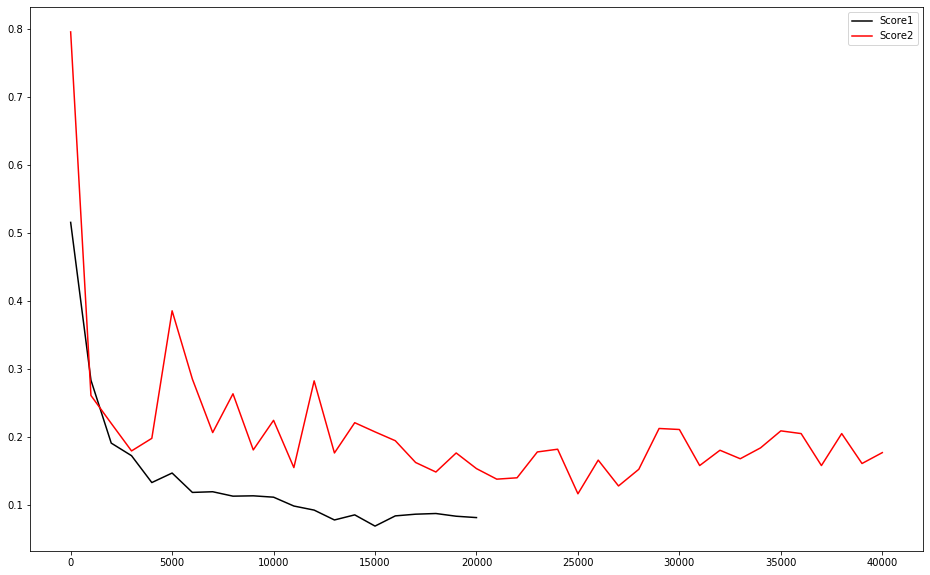

In [0]:
fig = plt.figure()
plt.plot(time_line_5, score5, color='black')
plt.plot(time_line_Net, scoreNet, color='red')
plt.legend(['Score1', "Score2", "Score3"], loc='upper right')

In [35]:
X_StratNet = Simple_Net(30, 20)
MaxEpoches = 20
scoreNetX = [Evaluate(X_StratNet.Move, StratNet.Move, 1000)]
time_line_Net_X = [0]
for epoche in range(MaxEpoches):
  for i in range(1000):
    result, story, moves = PlayGame(X_StratNet.SearchMove, StratNet.Move)
    for i in range(0, len(moves), 2):
      if i + 2 < len(moves):
        X_StratNet.UpdateQ(story[i], moves[i], story[i+2])
    
    if result == "O wrong move":
    #  MyStrat.SetQValue(story[-2], moves[-1], -100)
      print("Something goes wrong")
    if result == "X win":
      X_StratNet.SetQValue(story[-2], moves[-1], +1)
    if result == "O win":
      X_StratNet.SetQValue(story[-3], moves[-2], -1)
    if result == "draw":
      X_StratNet.SetQValue(story[-2], moves[-1], 0)
  scoreNetX.append(Evaluate(X_StratNet.Move, StratNet.Move, 1000))
  time_line_Net_X.append(1000*(epoche+1))


X: 0
O: 1000
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0
X: 1000
O: 0
D: 0


In [0]:
Evaluate(X_StratNet.Move, RandomMove, 1000)

X: 633
O: 126
D: 241


0.7535

In [0]:
X_StratNet = Simple_Net(30, 20)
MaxEpoches = 10
scoreNetXR = [Evaluate(X_StratNet.Move, RandomMove, 100)]
time_line_Net_XR = [0]
for epoche in range(MaxEpoches):
  for i in range(10):
    result, story, moves = PlayGame(X_StratNet.Move, RandomMove)
    for i in range(0, len(moves), 2):
      if i + 2 < len(moves):
        X_StratNet.UpdateQ(story[i], moves[i], story[i+2])
    
    if result == "O wrong move":
    #  MyStrat.SetQValue(story[-2], moves[-1], -100)
      print("Something goes wrong")
    if result == "X win":
      X_StratNet.SetQValue(story[-2], moves[-1], +1)
    if result == "O win":
      X_StratNet.SetQValue(story[-3], moves[-2], -1)
    if result == "draw":
      X_StratNet.SetQValue(story[-2], moves[-1], 0)
  scoreNetXR.append(Evaluate(X_StratNet.Move, RandomMove, 100))
  time_line_Net_XR.append(1000*(epoche+1))


X: 70
O: 18
D: 12
2 tensor([ 0.0152, -0.0333,  0.1928,  0.0502,  0.0574,  0.0958, -0.3232, -0.0186,
         0.0863], grad_fn=<AddBackward0>) 0.19279998540878296 tensor(0.1497, grad_fn=<SelectBackward>) 0.16260547935962677
5 tensor([ 0.0350, -0.0088,  0.2191,  0.0636,  0.0291,  0.0948, -0.3236, -0.0428,
         0.0508], grad_fn=<AddBackward0>) 0.21911603212356567 tensor(0.0934, grad_fn=<SelectBackward>) 0.13108932971954346
3 tensor([ 6.0726e-02,  6.7406e-03,  2.2486e-01,  4.5207e-02,  1.2892e-04,
         1.0588e-01, -3.0722e-01, -6.8943e-02,  4.2914e-02],
       grad_fn=<AddBackward0>) 0.22486278414726257 tensor(0.0628, grad_fn=<SelectBackward>) 0.1114475280046463
2 tensor([ 0.0094, -0.0445,  0.2135,  0.0441,  0.0577,  0.1311, -0.3040,  0.0062,
         0.0378], grad_fn=<AddBackward0>) 0.21351629495620728 tensor(0.1684, grad_fn=<SelectBackward>) 0.18192158639431
5 tensor([ 0.0255, -0.0048,  0.2208,  0.0641, -0.0034,  0.1343, -0.2883, -0.0478,
         0.0029], grad_fn=<AddBackward0>)

In [0]:
    print(output_next, best.item(), output[move], value)

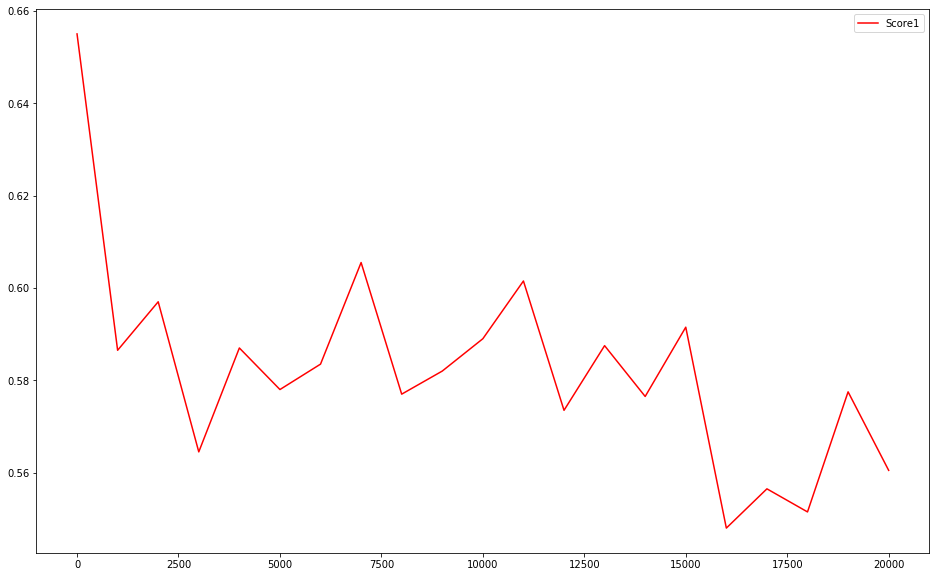

In [0]:
fig = plt.figure()
plt.plot(time_line_Net_XR, scoreNetXR, color='red')
plt.legend(['Score1', "Score2", "Score3"], loc='upper right')

In [0]:
X_StratNet(StratNet.BoardToTensor('.........'))

tensor([934261.6250, 104370.1641,  -2164.8325,  -2080.7212, 401052.5938,
        866661.1875, 429299.8750,  59625.3672,  -3548.1782],
       grad_fn=<AddBackward0>)

In [0]:
X_StratNet(StratNet.BoardToTensor('.X..O....'))

tensor([ 1.6167e+08,  1.8920e+09,  6.8736e+07,  8.0647e+07, -1.8443e+05,
         4.0910e+08,  1.7404e+09,  4.7719e+08, -3.6607e+05],
       grad_fn=<AddBackward0>)

In [0]:
print(X_StratNet(X_StratNet.BoardToTensor(story[-3])))
print(moves[-2])
X_StratNet.SetQValue(story[-3], moves[-2], -1)
print(X_StratNet(X_StratNet.BoardToTensor(story[-3])))


tensor([ 0.0259, -0.0035, -0.1472, -0.1672, -0.0269,  0.2246,  0.0321,  0.1319,
        -0.1318], grad_fn=<AddBackward0>)
1
tensor([ 0.0277, -0.0217, -0.1521, -0.1635, -0.0189,  0.2284,  0.0369,  0.1208,
        -0.1307], grad_fn=<AddBackward0>)


In [0]:
    print(output_next, best.item(), output[move], value)

In [0]:
while stat != "X win":
  stat, story, moves =  PlayGame(RandomMove, StratNet.Move)

In [0]:
StratNet(StratNet.BoardToTensor('....X....'))

In [0]:
for b in story:
  PrintBoard(b)

...
...
...

X..
...
...

X..
.O.
...

X..
XO.
...

X.O
XO.
...

X.O
XO.
X..



In [0]:
story

['.........', 'X........', 'X...O....', 'X..XO....', 'X.OXO....', 'X.OXO.X..']

In [0]:
StratNet(StratNet.BoardToTensor("X..XO...."))

tensor([ 1.7601,  0.3661,  2.2031,  0.8849,  3.0974, -0.5062,  1.3472,  0.5934,
         0.6719], grad_fn=<AddBackward0>)